In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
from scipy.signal import spectrogram as sp

In [22]:
morlet_wavelet_generator = lambda alpha, freq_0: lambda t: np.exp(-(t ** 2 / alpha ** 2)) * np.exp(1j * freq_0 * t)
fourier_morlet_wavelet_generator = lambda alpha, freq_0: lambda freq: alpha * np.sqrt(np.pi) * np.exp(
    -1 / 4 * (alpha ** 2) * (freq - freq_0) ** 2)

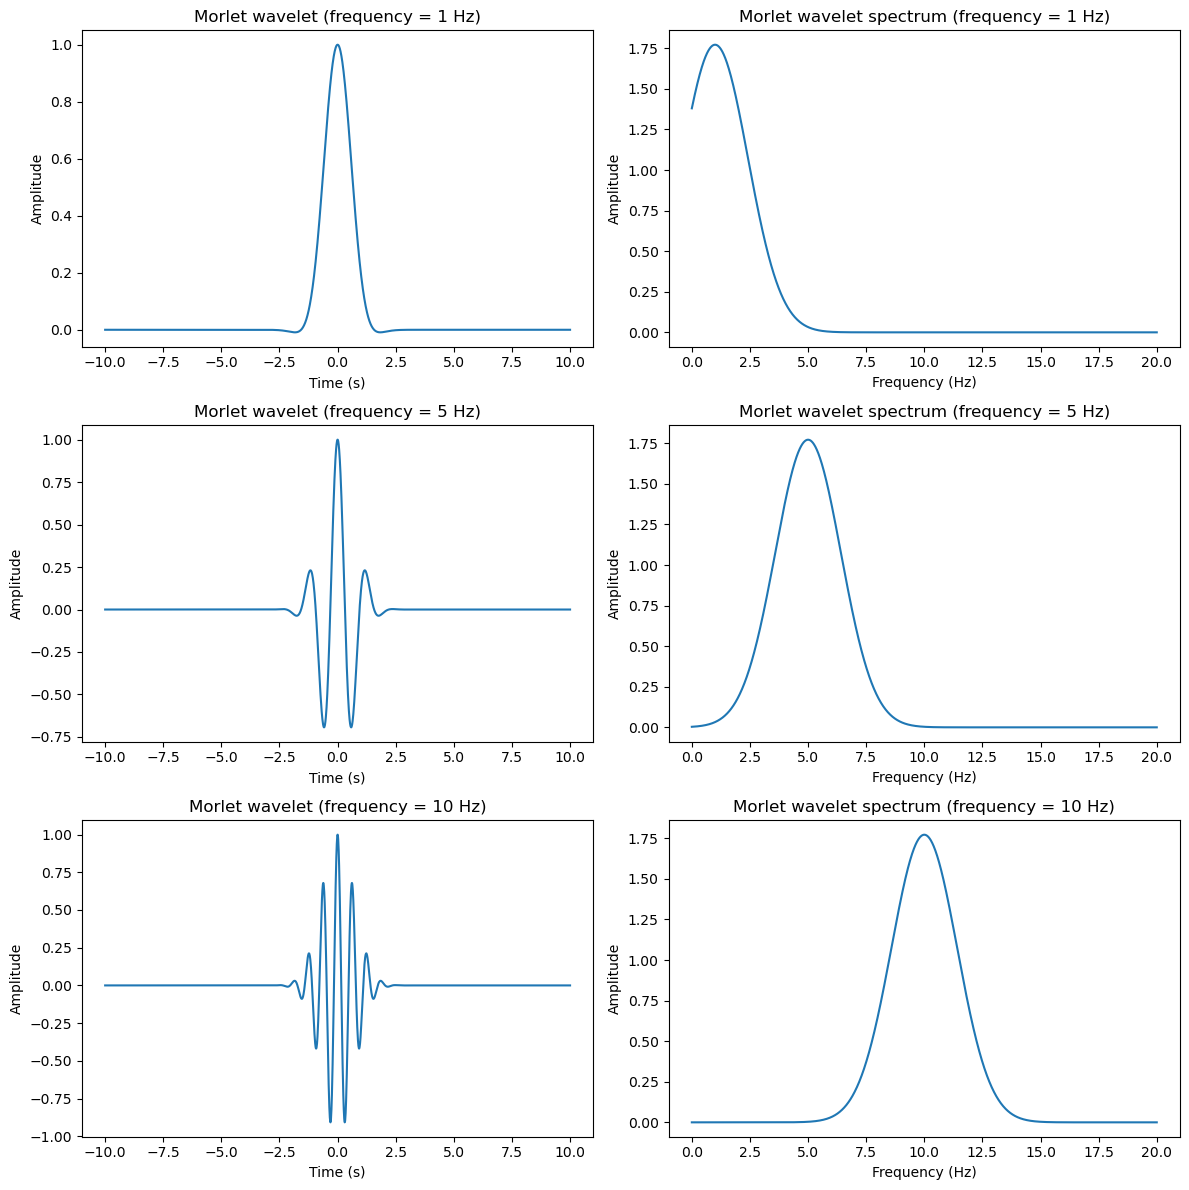

In [23]:
t = np.linspace(-10, 10, 2000)
freq = np.linspace(0, 20, 2000)

plt.figure(figsize=(12, 12))

plt.subplot(321)
plt.title("Morlet wavelet (frequency = 1 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t, np.real(morlet_wavelet_generator(alpha=1, freq_0=1)(t)))

plt.subplot(322)
plt.title("Morlet wavelet spectrum (frequency = 1 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.plot(freq, np.abs(fourier_morlet_wavelet_generator(alpha=1, freq_0=1)(freq)))

plt.subplot(323)
plt.title("Morlet wavelet (frequency = 5 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t, np.real(morlet_wavelet_generator(alpha=1, freq_0=5)(t)))

plt.subplot(324)
plt.title("Morlet wavelet spectrum (frequency = 5 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.plot(freq, np.abs(fourier_morlet_wavelet_generator(alpha=1, freq_0=5)(freq)))

plt.subplot(325)
plt.title("Morlet wavelet (frequency = 10 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t, np.real(morlet_wavelet_generator(alpha=1, freq_0=10)(t)))

plt.subplot(326)
plt.title("Morlet wavelet spectrum (frequency = 10 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.plot(freq, np.abs(fourier_morlet_wavelet_generator(alpha=1, freq_0=10)(freq)))

plt.tight_layout()
plt.show()

In [24]:
mexican_hat_wavelet_generator = lambda std, t_0, freq_0: lambda t: (1 - (t - t_0) ** 2 / std ** 2) * np.exp(
    -(t - t_0) ** 2 / (2 * std ** 2)) * np.exp(1j * freq_0 * t)
fourier_mexican_hat_wavelet_generator = lambda std, freq_0: lambda freq: (freq - freq_0) ** 2 * np.exp(
    -1 / 2 * (freq - freq_0) ** 2 * std ** 2)

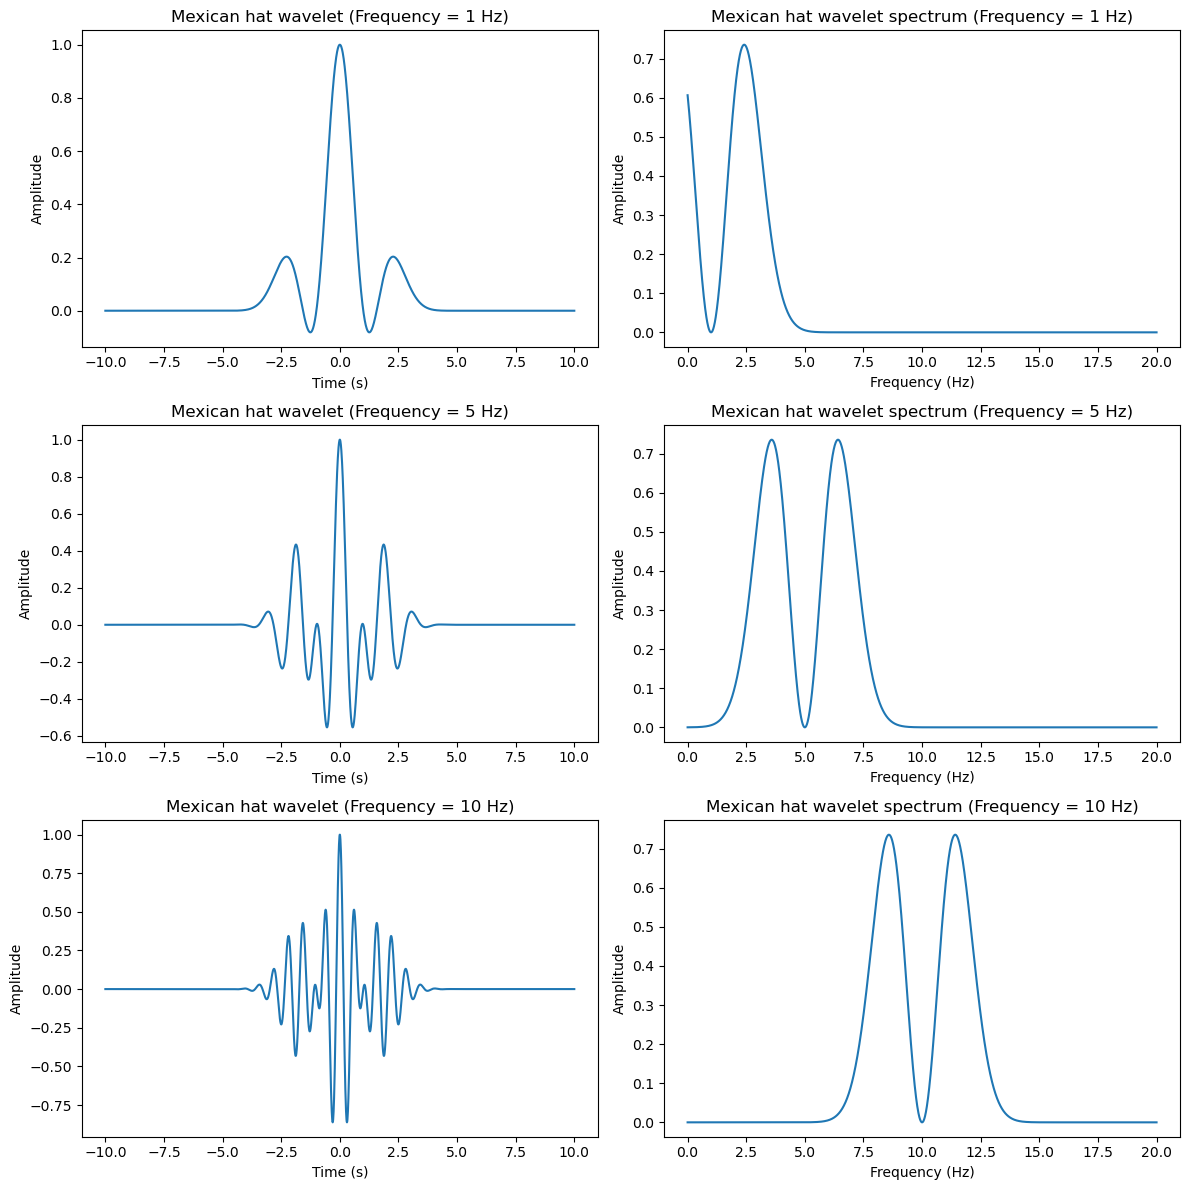

In [25]:
t = np.linspace(-10, 10, 2000)
freq = np.linspace(0, 20, 2000)

plt.figure(figsize=(12, 12))

plt.subplot(321)
plt.title("Mexican hat wavelet (Frequency = 1 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t, np.real(mexican_hat_wavelet_generator(std=1, t_0=0, freq_0=1)(t)))

plt.subplot(322)
plt.title("Mexican hat wavelet spectrum (Frequency = 1 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.plot(freq, np.abs(fourier_mexican_hat_wavelet_generator(std=1, freq_0=1)(freq)))

plt.subplot(323)
plt.title("Mexican hat wavelet (Frequency = 5 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t, np.real(mexican_hat_wavelet_generator(std=1, t_0=0, freq_0=5)(t)))

plt.subplot(324)
plt.title("Mexican hat wavelet spectrum (Frequency = 5 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.plot(freq, np.abs(fourier_mexican_hat_wavelet_generator(std=1, freq_0=5)(freq)))

plt.subplot(325)
plt.title("Mexican hat wavelet (Frequency = 10 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t, np.real(mexican_hat_wavelet_generator(std=1, t_0=0, freq_0=10)(t)))

plt.subplot(326)
plt.title("Mexican hat wavelet spectrum (Frequency = 10 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.plot(freq, np.abs(fourier_mexican_hat_wavelet_generator(std=1, freq_0=10)(freq)))

plt.tight_layout()
plt.show()

In [26]:
def haar_wavelet(t):
    t = np.array(t, dtype=np.float64)
    out = np.empty_like(t, dtype=np.float64)
    for i in range(len(t)):
        if 0 <= t[i] < 0.5:
            out[i] = 1
        elif 0.5 <= t[i] < 1:
            out[i] = -1
        else:
            out[i] = 0
    return out


haar_wavelet_scaled = lambda a, t: (1 / np.sqrt(a)) * haar_wavelet(t / a)

fourier_haar_wavelet = lambda freq: 2j * np.sin(freq / 2) * np.exp(-1j * freq / 2)

fourier_haar_wavelet_scaled = lambda a, freq: np.sqrt(a) * fourier_haar_wavelet(a * freq)

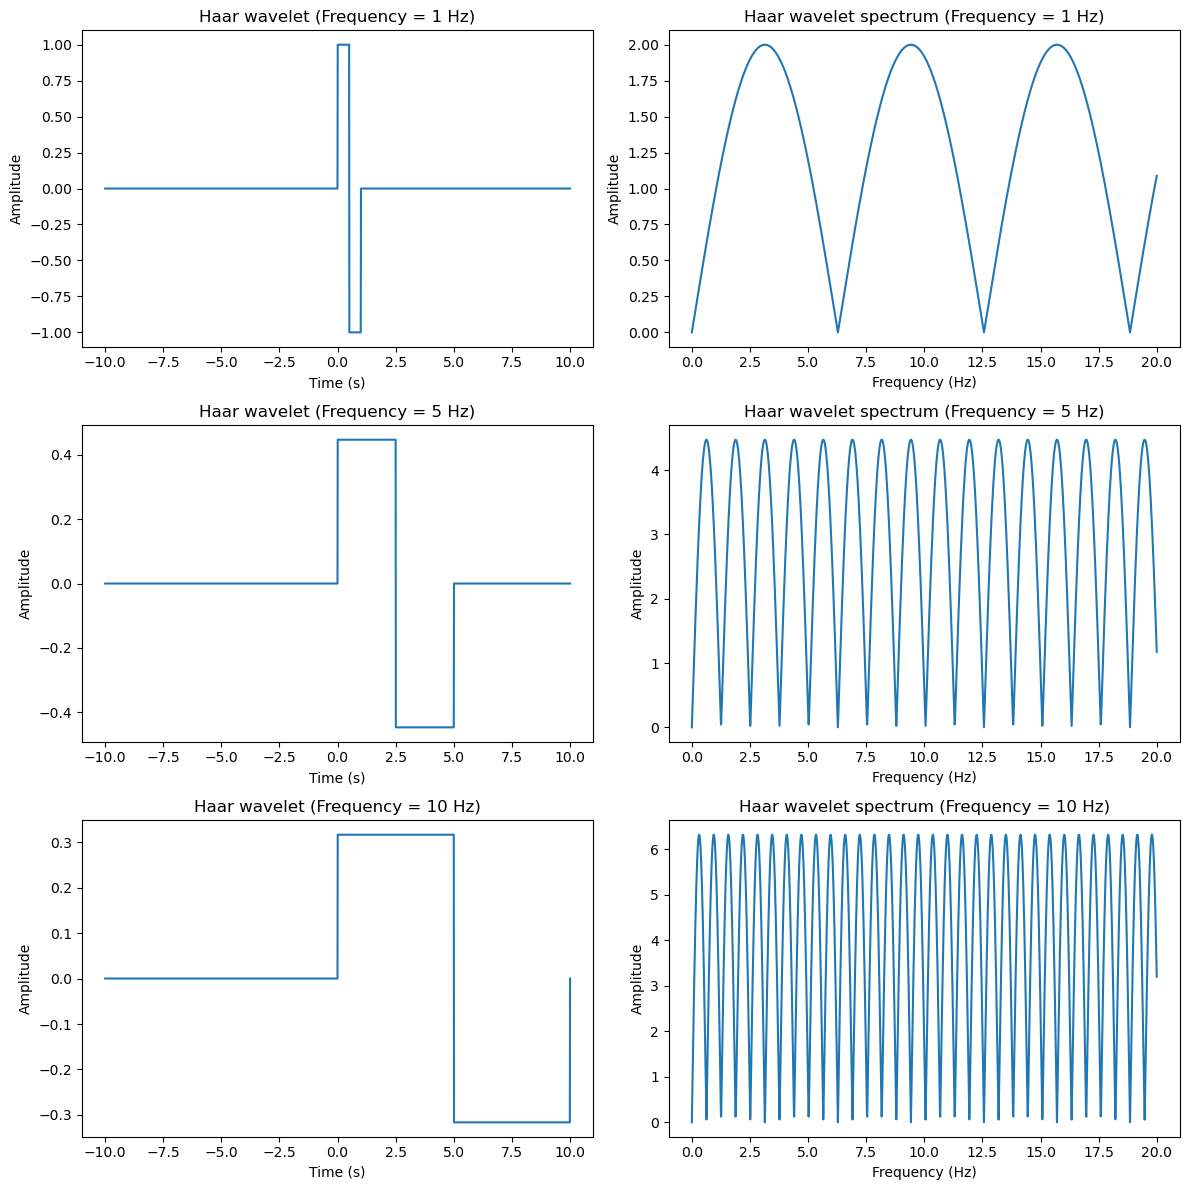

In [27]:
t = np.linspace(-10, 10, 2000)
freq = np.linspace(0, 20, 2000)

plt.figure(figsize=(12, 12))

plt.subplot(321)
plt.title("Haar wavelet (Frequency = 1 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t, np.real(haar_wavelet_scaled(1, t)))

plt.subplot(322)
plt.title("Haar wavelet spectrum (Frequency = 1 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.plot(freq, np.abs(fourier_haar_wavelet_scaled(1, freq)))

plt.subplot(323)
plt.title("Haar wavelet (Frequency = 5 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t, np.real(haar_wavelet_scaled(5, t)))

plt.subplot(324)
plt.title("Haar wavelet spectrum (Frequency = 5 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.plot(freq, np.abs(fourier_haar_wavelet_scaled(5, freq)))

plt.subplot(325)
plt.title("Haar wavelet (Frequency = 10 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t, np.real(haar_wavelet_scaled(10, t)))

plt.subplot(326)
plt.title("Haar wavelet spectrum (Frequency = 10 Hz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.plot(freq, np.abs(fourier_haar_wavelet_scaled(10, freq)))

plt.tight_layout()
plt.show()

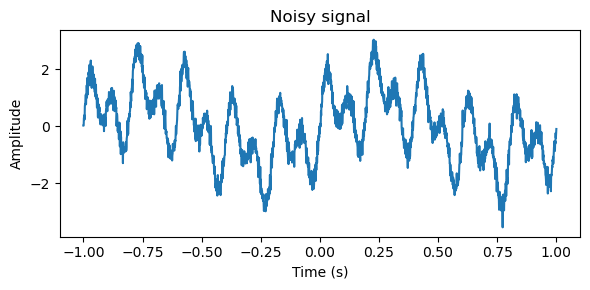

/usr/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


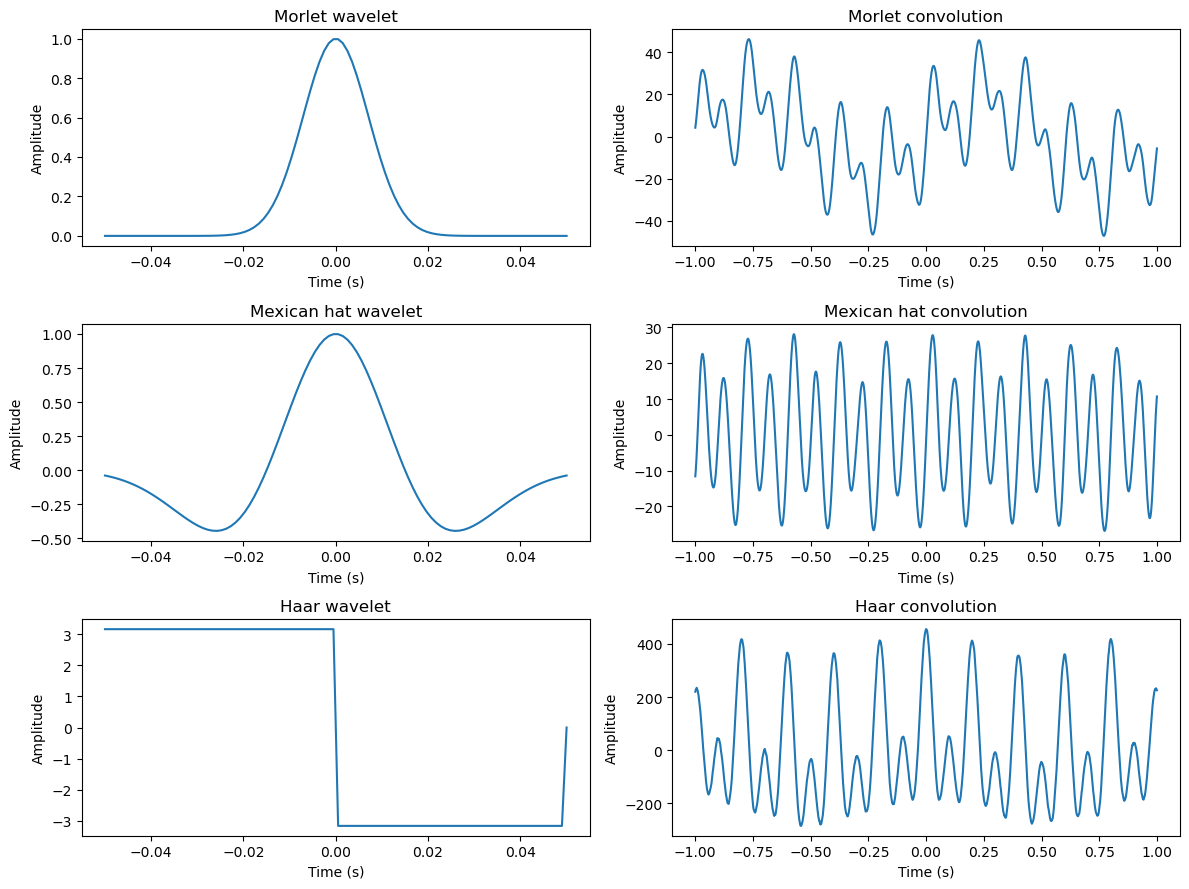

In [28]:
signal = lambda t: np.sin(2 * np.pi * t * 1) + np.sin(2 * np.pi * t * 5) + np.sin(2 * np.pi * t * 10)
signal_noisy = lambda t: signal(t) + np.random.normal(0, 0.2, size=len(t))

signal_t = np.linspace(-1, 1, 2000)
kernel_t = np.linspace(-0.05, 0.05, 100)
signal_y = signal_noisy(signal_t)

plt.figure(figsize=(6, 3))

plt.title("Noisy signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(signal_t, signal_y)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 9))

plt.subplot(321)
plt.title("Morlet wavelet")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
morlet_y = morlet_wavelet_generator(alpha=0.01, freq_0=1)(kernel_t)
plt.plot(kernel_t, morlet_y)

plt.subplot(322)
plt.title("Morlet convolution")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
convolution_morlet = np.convolve(signal_y, np.real(morlet_y), mode='same')
plt.plot(signal_t, convolution_morlet)

plt.subplot(323)
plt.title("Mexican hat wavelet")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
mexican_hat_y = mexican_hat_wavelet_generator(std=0.015, t_0=0, freq_0=3)(kernel_t)
plt.plot(kernel_t, mexican_hat_y)

plt.subplot(324)
plt.title("Mexican hat convolution")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
convolution_mexican_hat = np.convolve(signal_y, np.real(mexican_hat_y), mode='same')
plt.plot(signal_t, convolution_mexican_hat)

plt.subplot(325)
plt.title("Haar wavelet")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
haar_y = haar_wavelet_scaled(a=0.1, t=kernel_t + 0.05)
plt.plot(kernel_t, haar_y)

plt.subplot(326)
plt.title("Haar convolution")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
convolution_haar = np.convolve(signal_y, np.real(haar_y), mode='same')
plt.plot(signal_t, convolution_haar)

plt.tight_layout()
plt.show()

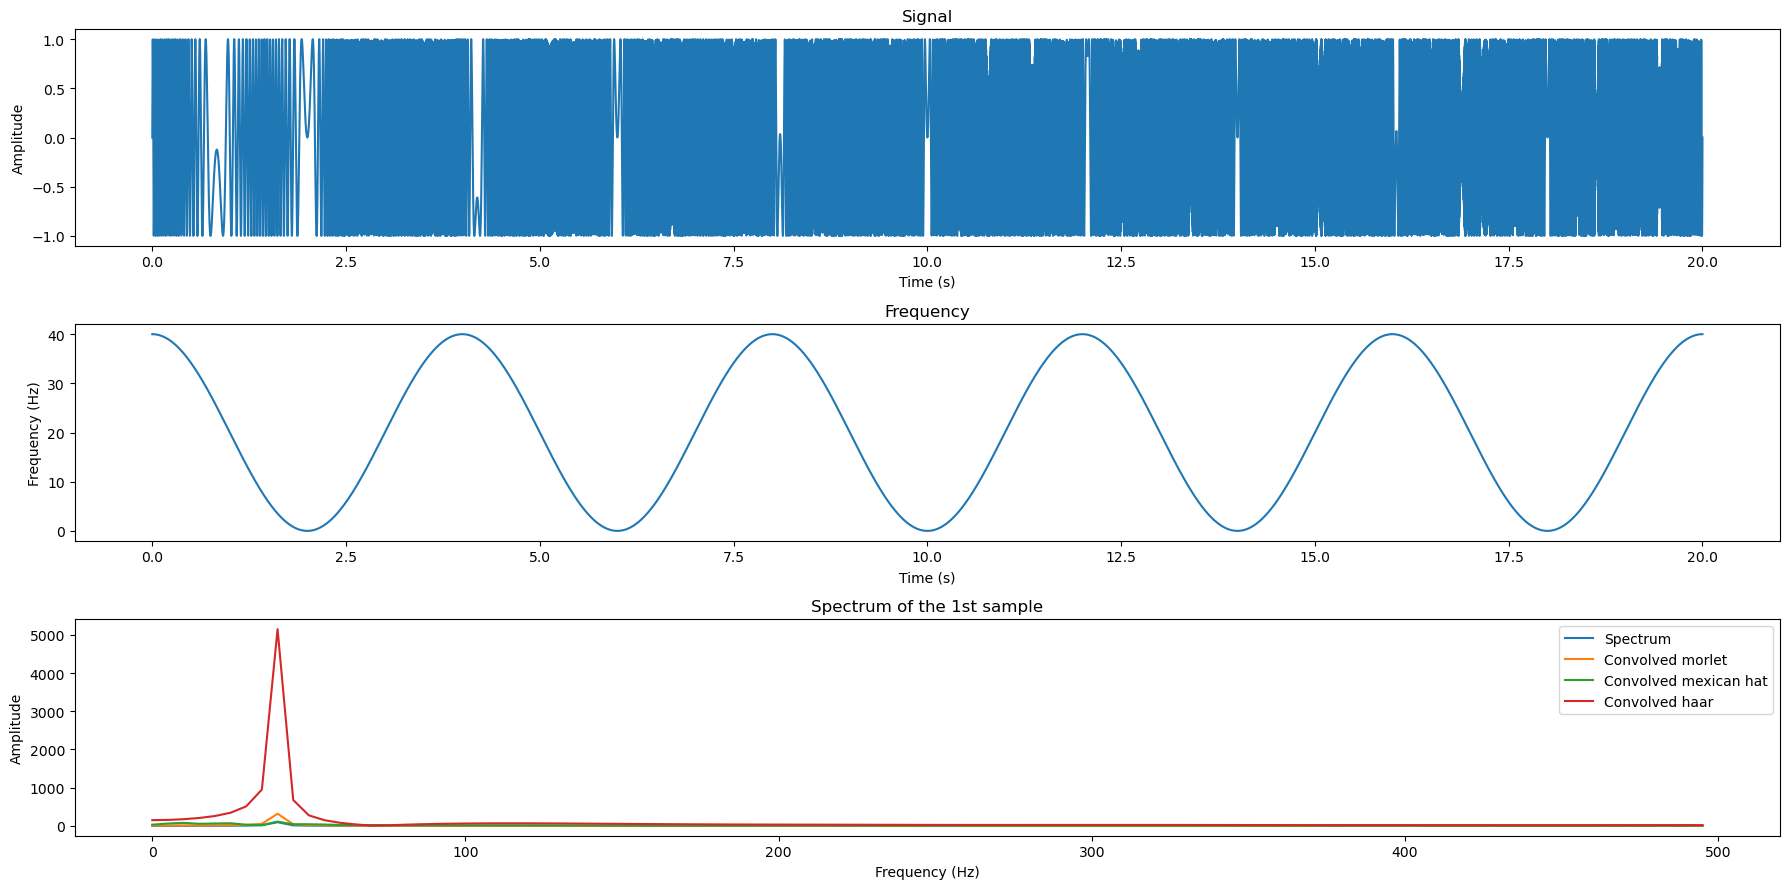

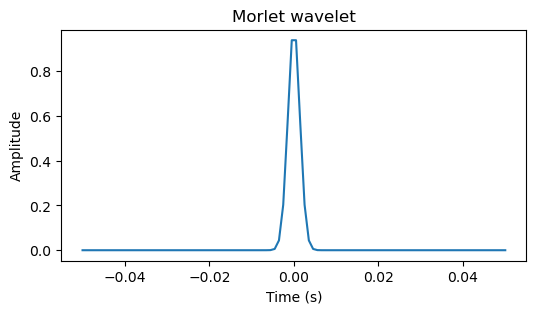

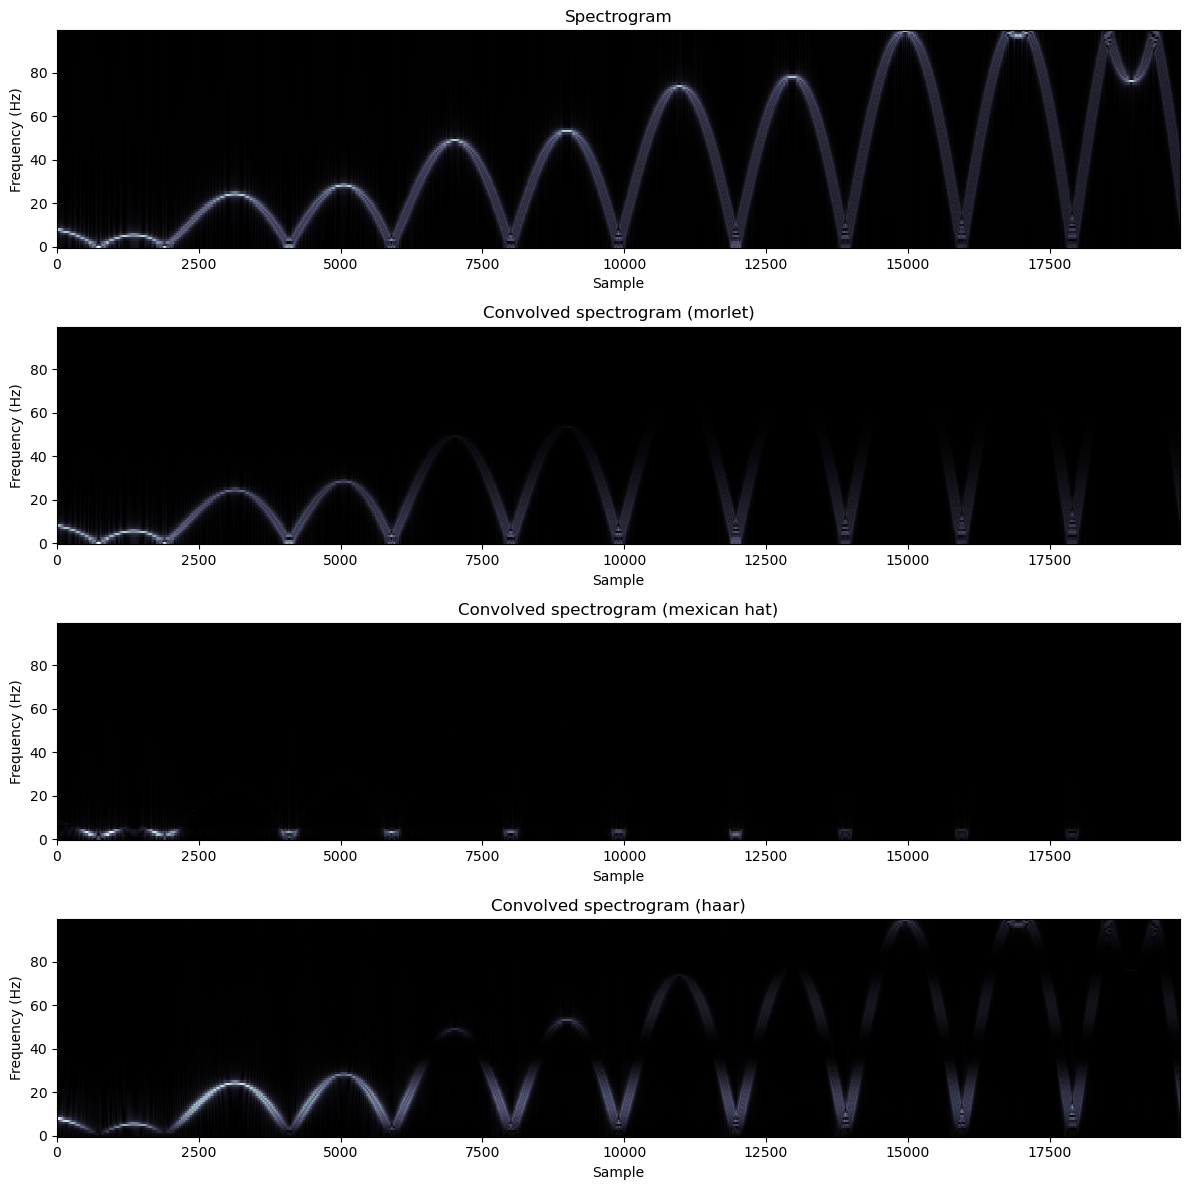

In [29]:
t0 = 0.0
t1 = 20.0
N = 20000
sample_length = 200
step = float(t1 - t0) / N

frequency = lambda t: 20 + 20 * np.cos(2 * np.pi * t * 0.25)
signal = lambda t: np.sin(2 * np.pi * t * frequency(t))
t = np.linspace(t0, t1, N)

plt.figure(figsize=(18, 9))
plt.subplot(311)
plt.title("Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(t, signal(t))

plt.subplot(312)
plt.title("Frequency")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.plot(t, frequency(t))

kernel_x = np.linspace(-0.05, 0.05, 100)
morlet_y = morlet_wavelet_generator(alpha=0.002, freq_0=5)(kernel_x)
mexican_hat_y = mexican_hat_wavelet_generator(std=0.02, t_0=0, freq_0=3)(kernel_x)
haar_y = haar_wavelet_scaled(a=0.01, t=kernel_x)

spectrogram = np.zeros(shape=(N - sample_length + 1, sample_length // 2))
spectrogram_morlet = np.zeros(shape=(N - sample_length + 1, sample_length // 2))
spectrogram_mexican_hat = np.zeros(shape=(N - sample_length + 1, sample_length // 2))
spectrogram_haar = np.zeros(shape=(N - sample_length + 1, sample_length // 2))
for sample_start in range(N - sample_length + 1):
    t = np.linspace(t0 + sample_start * step, t0 + (sample_start + sample_length) * step, sample_length)
    spectrogram[sample_start] = np.abs(fft.fft(signal(t))[0:sample_length // 2])
    spectrogram_morlet[sample_start] = np.abs(
        fft.fft(np.convolve(signal(t), morlet_y, mode='same'))[0:sample_length // 2])
    spectrogram_mexican_hat[sample_start] = np.abs(
        fft.fft(np.convolve(signal(t), mexican_hat_y, mode='same'))[0:sample_length // 2])
    spectrogram_haar[sample_start] = np.abs(fft.fft(np.convolve(signal(t), haar_y, mode='same'))[0:sample_length // 2])

plt.subplot(313)
plt.title("Spectrum of the 1st sample")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
fft_x = fft.fftfreq(sample_length, step)
plt.plot(fft_x[0:sample_length // 2], spectrogram[0])
plt.plot(fft_x[0:sample_length // 2], spectrogram_morlet[0])
plt.plot(fft_x[0:sample_length // 2], spectrogram_mexican_hat[0])
plt.plot(fft_x[0:sample_length // 2], spectrogram_haar[0])
plt.legend(["Spectrum", "Convolved morlet", "Convolved mexican hat", "Convolved haar"])
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))
plt.title("Morlet wavelet")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.plot(kernel_x, morlet_y)
plt.show()

plt.figure(figsize=(12, 12))
plt.subplot(411)
plt.title("Spectrogram")
plt.xlabel("Sample")
plt.ylabel("Frequency (Hz)")
plt.imshow(np.transpose(spectrogram), cmap='bone', aspect='auto', origin='lower', interpolation='none')

plt.subplot(412)
plt.title("Convolved spectrogram (morlet)")
plt.xlabel("Sample")
plt.ylabel("Frequency (Hz)")
plt.imshow(np.transpose(spectrogram_morlet), cmap='bone', aspect='auto', origin='lower', interpolation='none')

plt.subplot(413)
plt.title("Convolved spectrogram (mexican hat)")
plt.xlabel("Sample")
plt.ylabel("Frequency (Hz)")
plt.imshow(np.transpose(spectrogram_mexican_hat), cmap='bone', aspect='auto', origin='lower', interpolation='none')

plt.subplot(414)
plt.title("Convolved spectrogram (haar)")
plt.xlabel("Sample")
plt.ylabel("Frequency (Hz)")
plt.imshow(np.transpose(spectrogram_haar), cmap='bone', aspect='auto', origin='lower', interpolation='none')

plt.tight_layout()
plt.show()

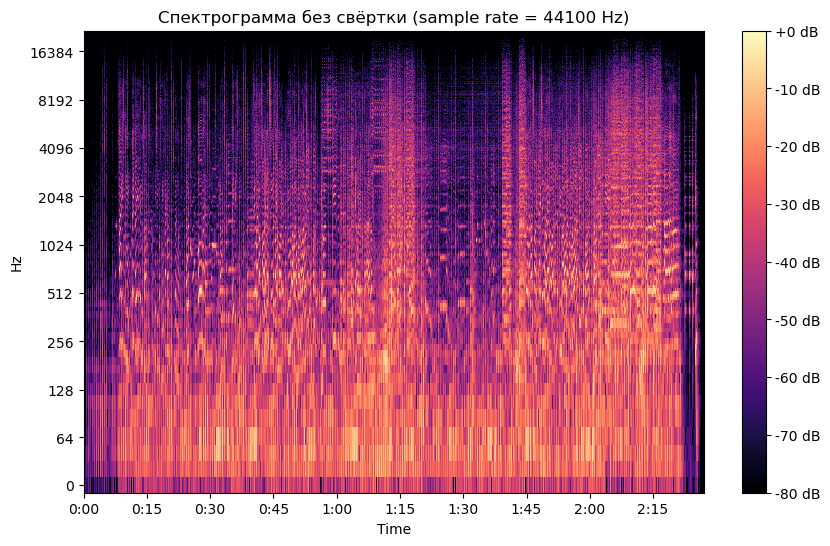

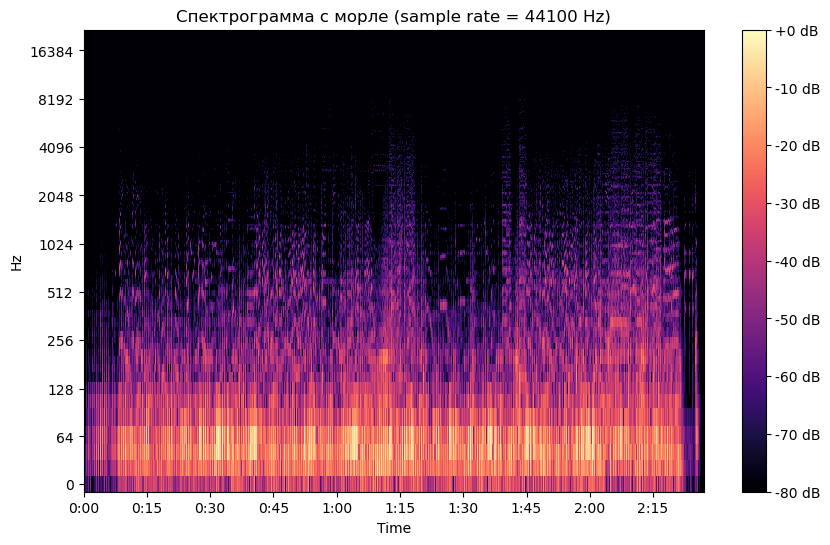

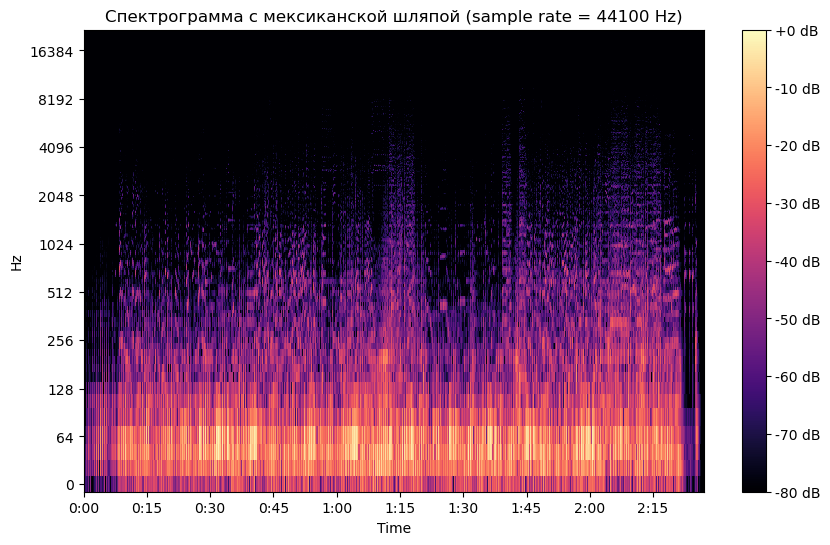

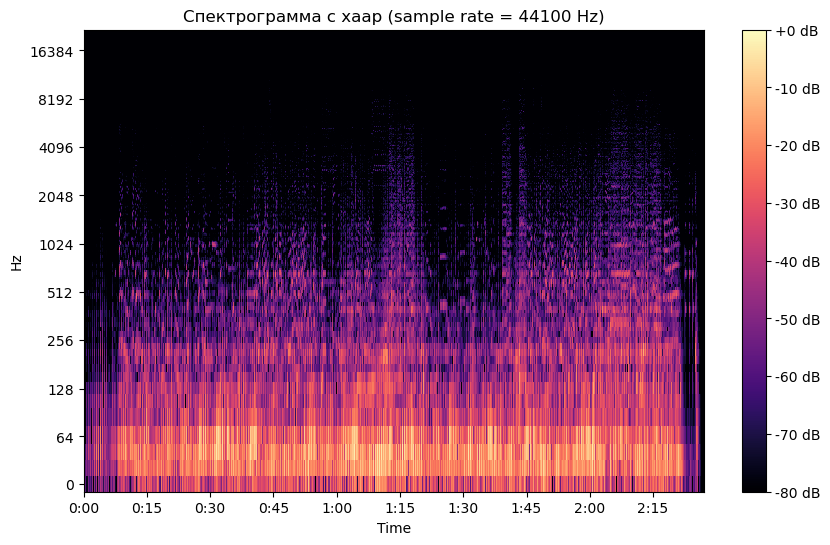

In [30]:
import librosa


def visualise_spectrogram(title, data, sample_rate):
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(data, x_axis='time', y_axis='log', sr=sample_rate)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{title} (sample rate = {sample_rate} Hz)')
    plt.show()


data, sample_rate = librosa.load('music.mp3', sr=None)
N = 1000

kernel_t = np.linspace(-0.5 * N / sample_rate, 0.5 * N / sample_rate, N)
data_morlet = np.real(np.convolve(data, morlet_wavelet_generator(alpha=1, freq_0=256)(kernel_t), mode='same'))
data_mexican_hat = np.real(
    np.convolve(data, mexican_hat_wavelet_generator(std=1, t_0=0, freq_0=256)(kernel_t), mode='same'))
data_haar = np.real(np.convolve(data, haar_wavelet_scaled(a=256, t=kernel_t), mode='same'))

visualise_spectrogram("Спектрограмма без свёртки", librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max),
                      sample_rate)
visualise_spectrogram("Спектрограмма с морле", librosa.amplitude_to_db(np.abs(librosa.stft(data_morlet)), ref=np.max),
                      sample_rate)
visualise_spectrogram("Спектрограмма с мексиканской шляпой",
                      librosa.amplitude_to_db(np.abs(librosa.stft(data_mexican_hat)), ref=np.max), sample_rate)
visualise_spectrogram("Спектрограмма с хаар", librosa.amplitude_to_db(np.abs(librosa.stft(data_haar)), ref=np.max),
                      sample_rate)

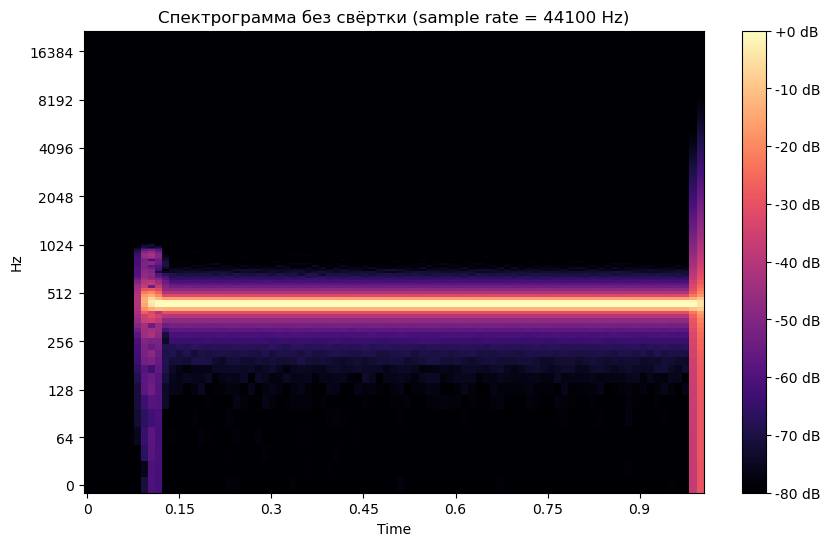

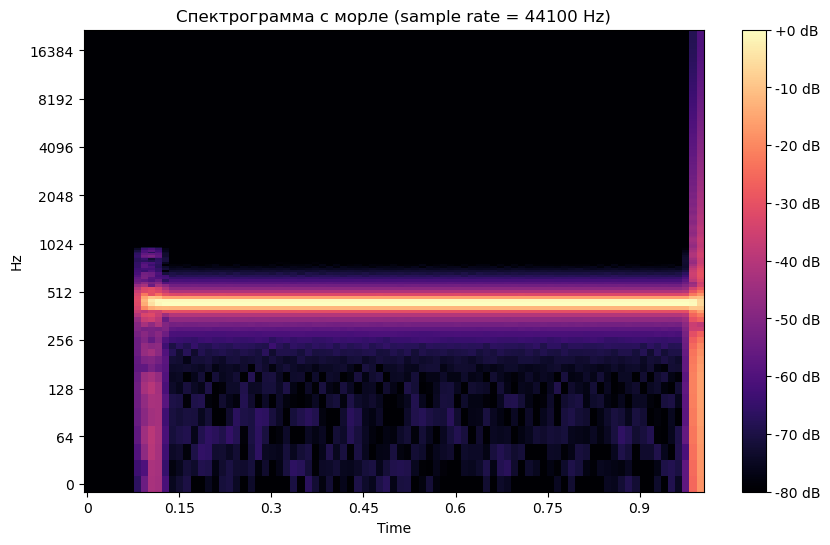

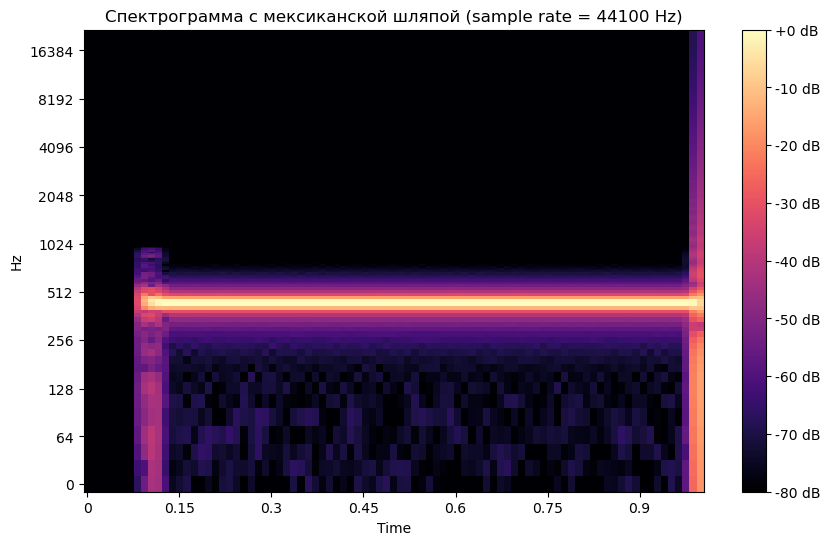

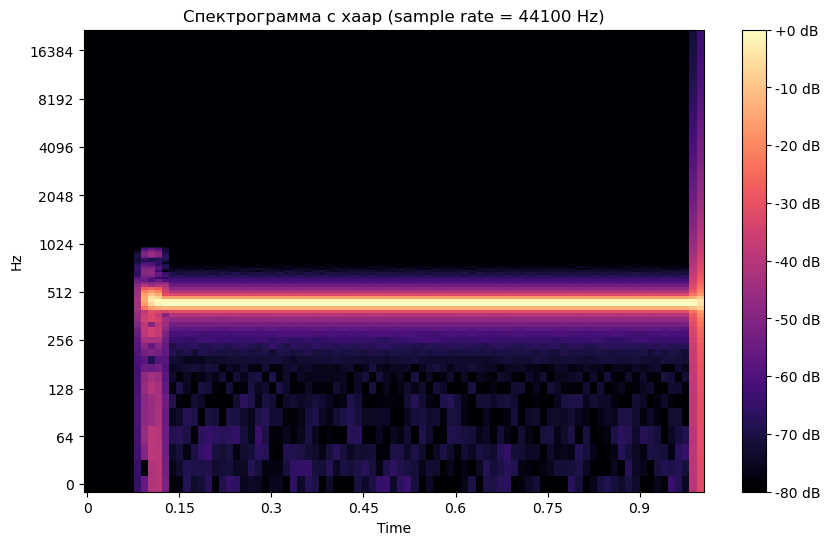

In [31]:
import librosa


def visualise_spectrogram(title, data, sample_rate):
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(data, x_axis='time', y_axis='log', sr=sample_rate)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{title} (sample rate = {sample_rate} Hz)')
    plt.show()


data, sample_rate = librosa.load('440 Hz.mp3', sr=None)
N = 441

kernel_t = np.linspace(-0.5 * N / sample_rate, 0.5 * N / sample_rate, N)
data_morlet = np.real(np.convolve(data, morlet_wavelet_generator(alpha=1, freq_0=440)(kernel_t), mode='same'))
data_mexican_hat = np.real(
    np.convolve(data, mexican_hat_wavelet_generator(std=1, t_0=0, freq_0=440)(kernel_t), mode='same'))
data_haar = np.real(np.convolve(data, haar_wavelet_scaled(a=440, t=kernel_t), mode='same'))

visualise_spectrogram("Спектрограмма без свёртки", librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max),
                      sample_rate)
visualise_spectrogram("Спектрограмма с морле", librosa.amplitude_to_db(np.abs(librosa.stft(data_morlet)), ref=np.max),
                      sample_rate)
visualise_spectrogram("Спектрограмма с мексиканской шляпой",
                      librosa.amplitude_to_db(np.abs(librosa.stft(data_mexican_hat)), ref=np.max), sample_rate)
visualise_spectrogram("Спектрограмма с хаар", librosa.amplitude_to_db(np.abs(librosa.stft(data_haar)), ref=np.max),
                      sample_rate)